In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation
from PIL import Image

In [12]:
x_ions = []
with open ('n_el.txt') as data:
    for line in data:
        x_ions.append(line.split())
    #print(type(data))
x_ions = np.array(x_ions).astype(np.int16)

#print(x_el[0])

In [13]:
print(len(line))
print(len(np.arange(250)))

292
250


C:\Users\KF36F\AppData\Local\Temp\ipykernel_21780\1795919585.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


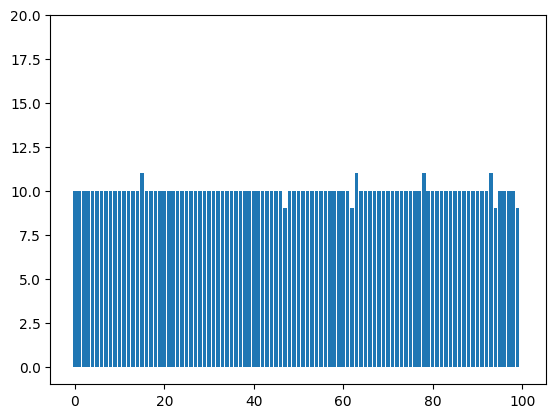

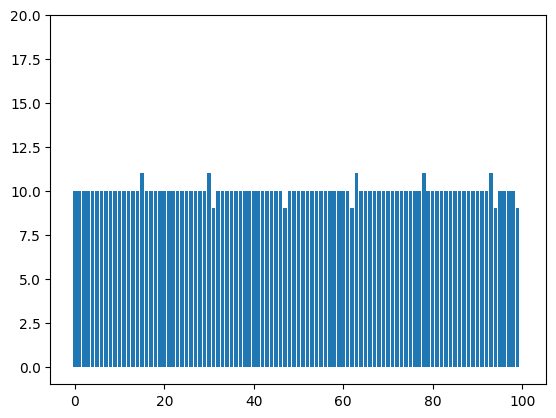

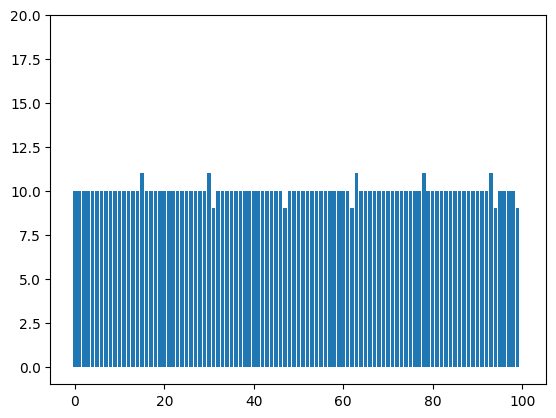

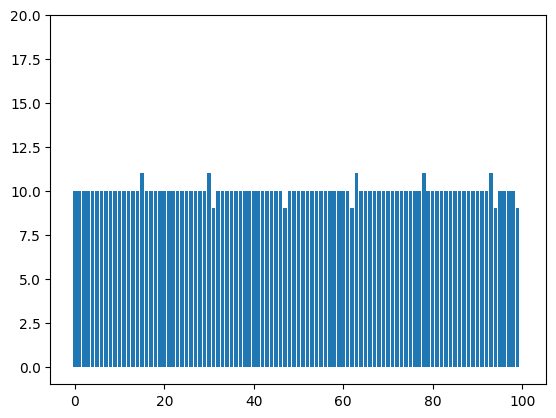

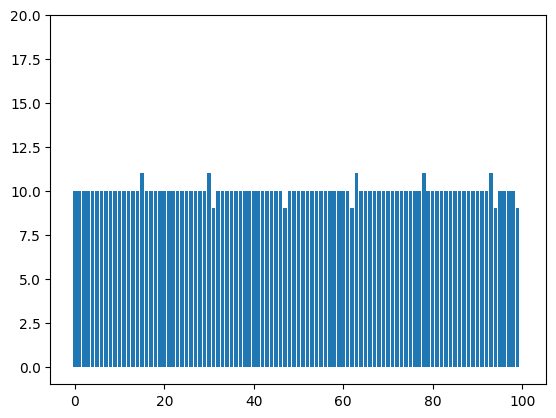

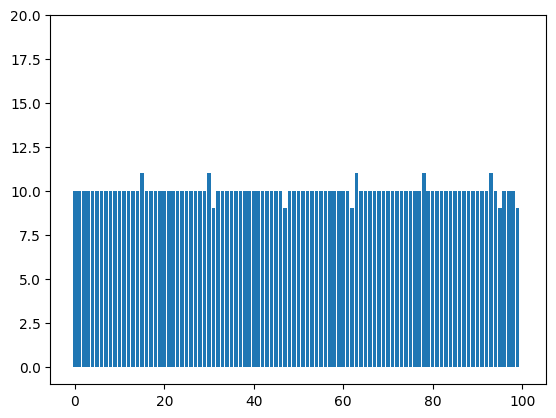

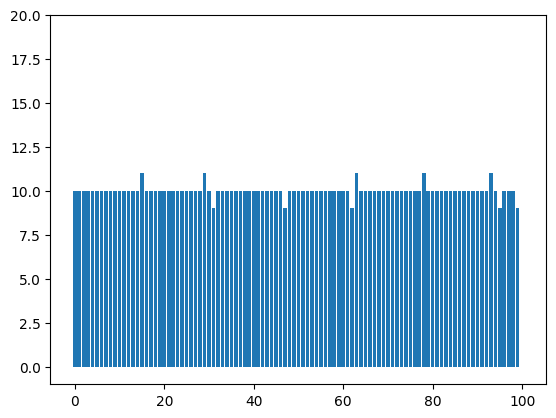

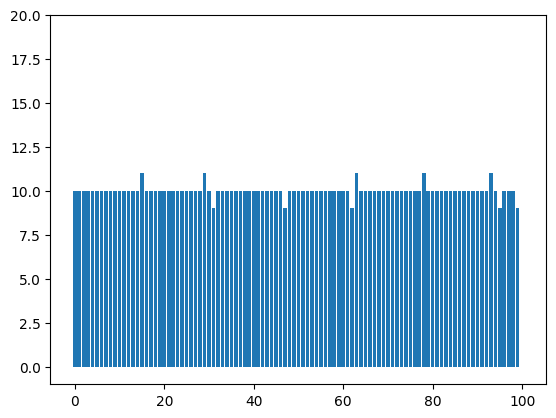

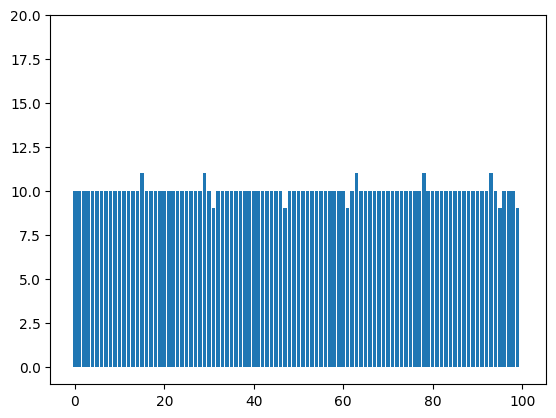

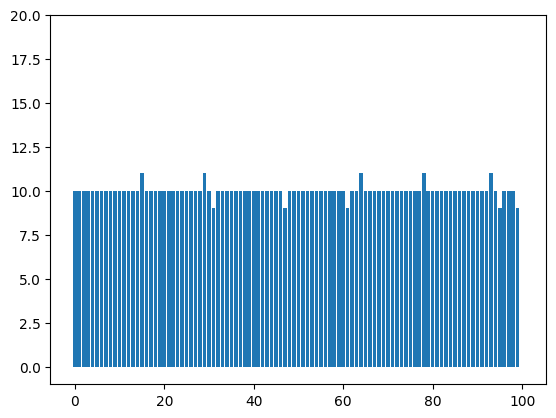

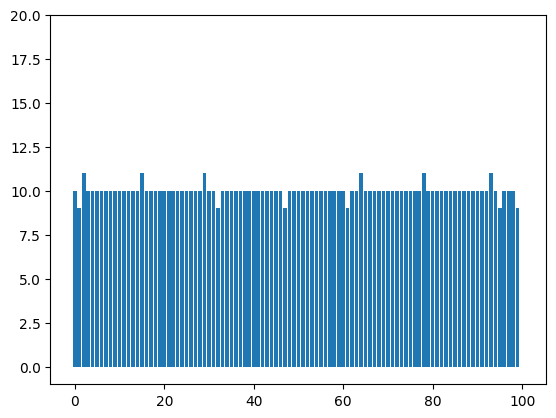

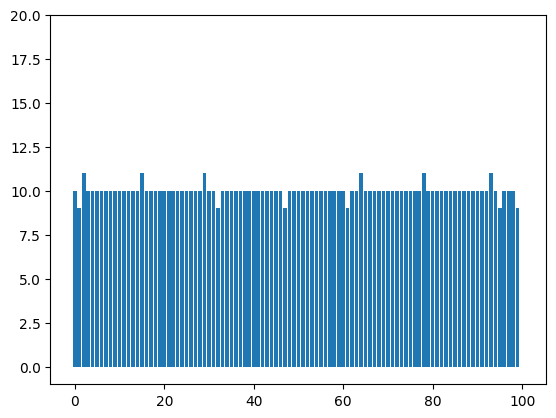

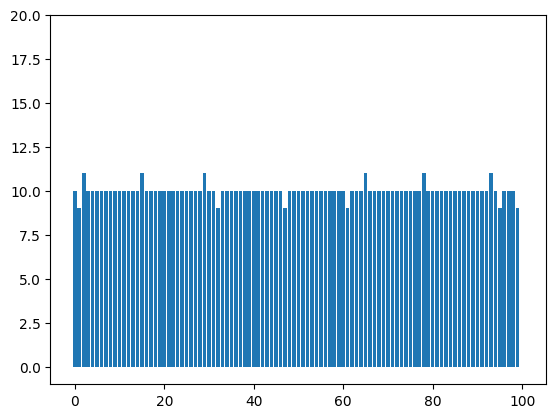

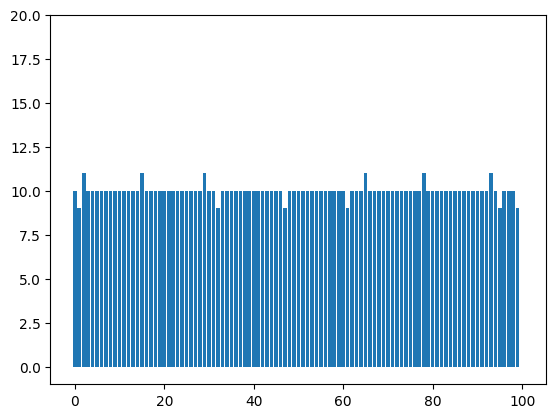

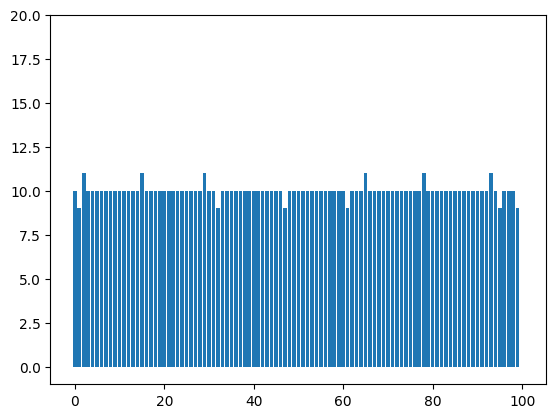

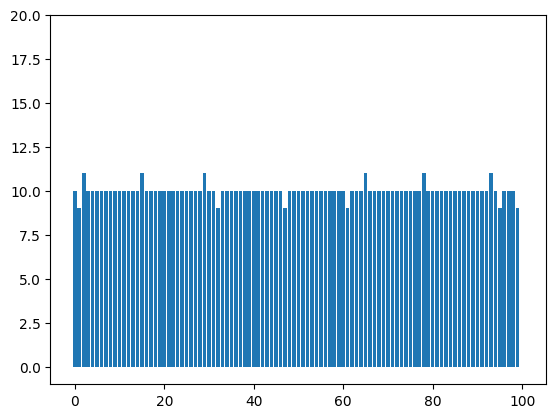

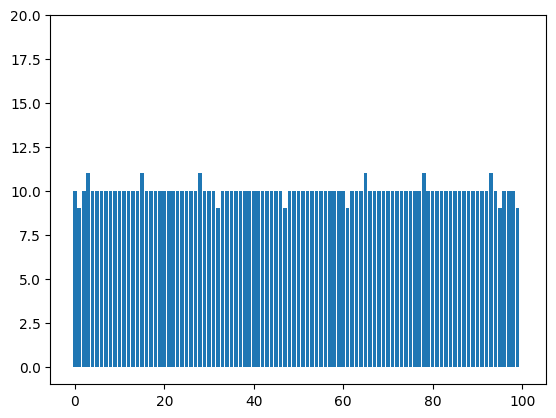

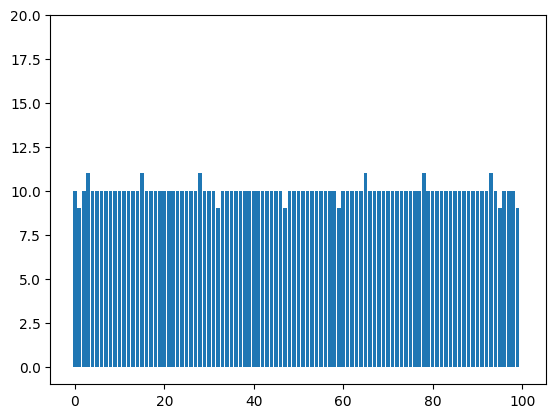

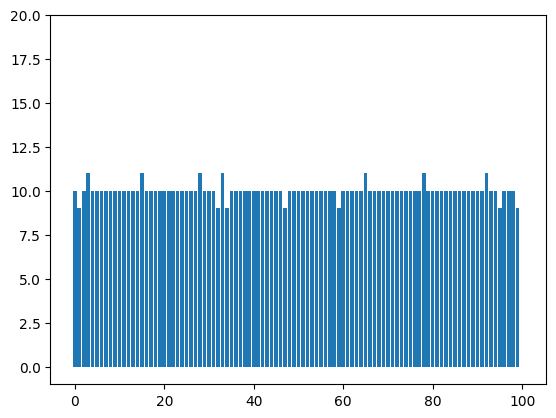

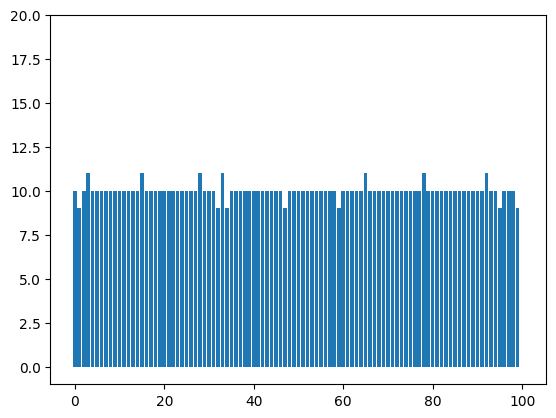

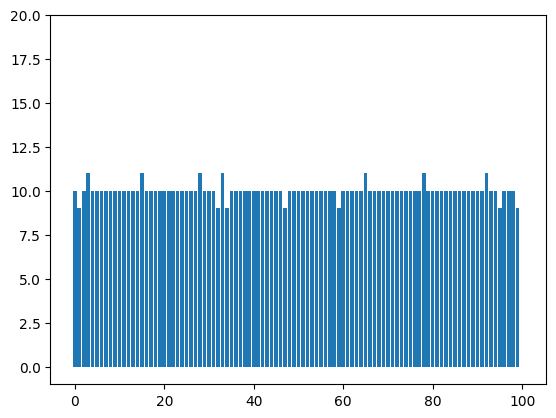

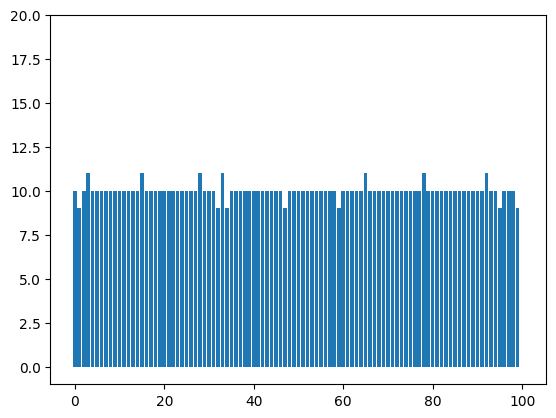

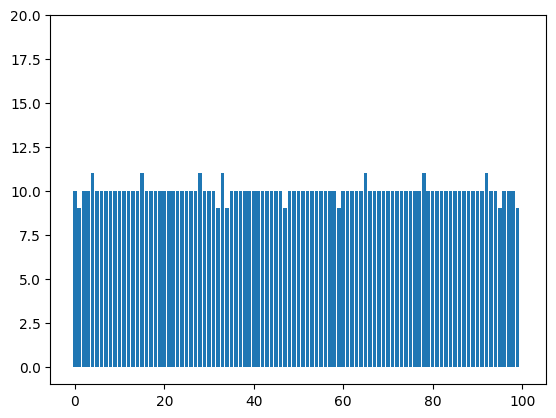

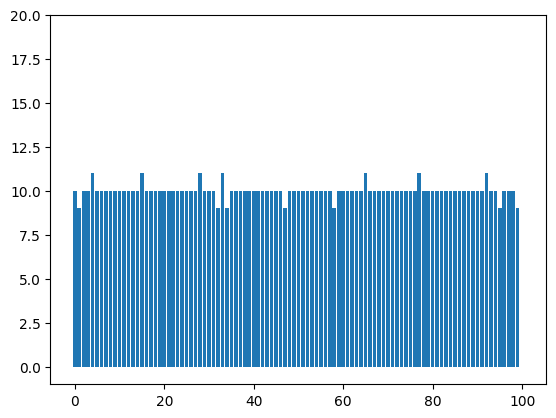

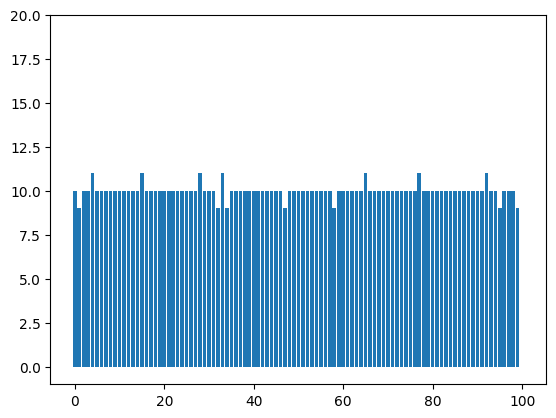

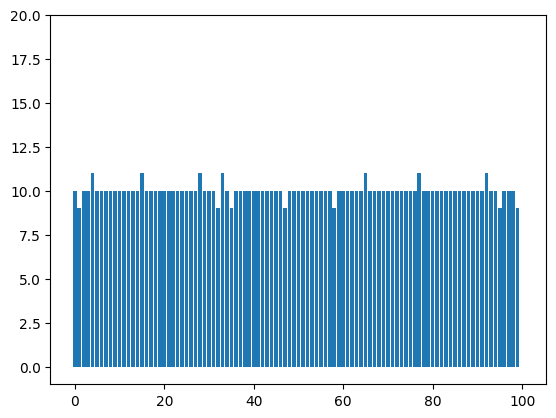

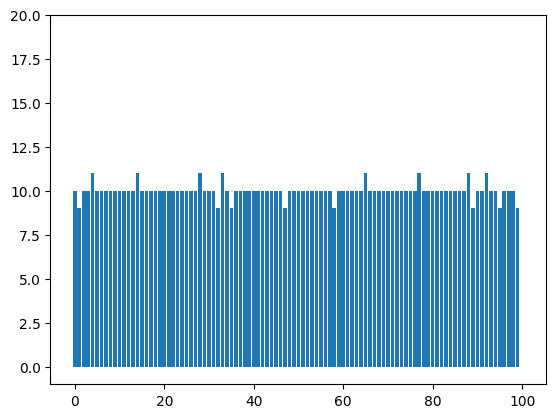

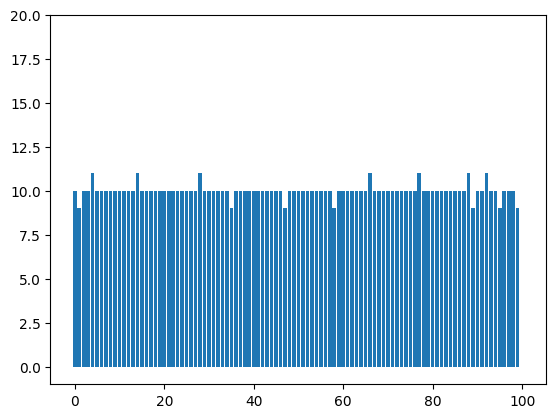

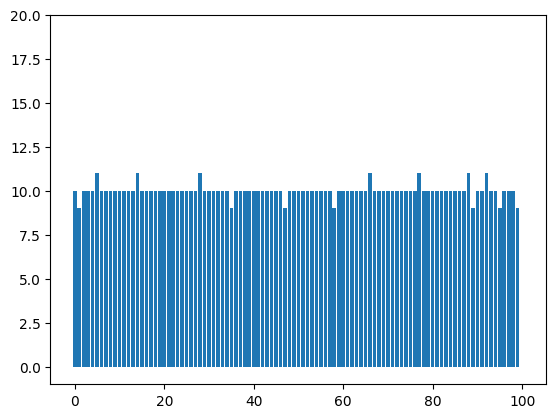

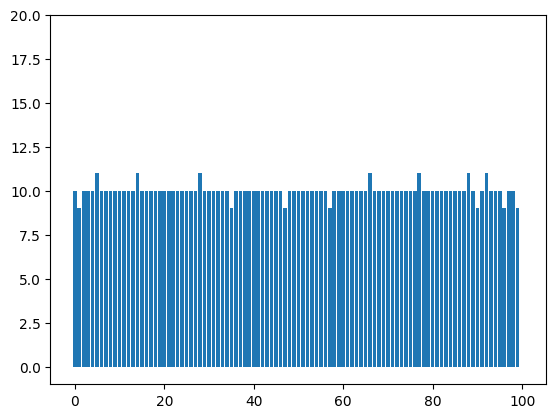

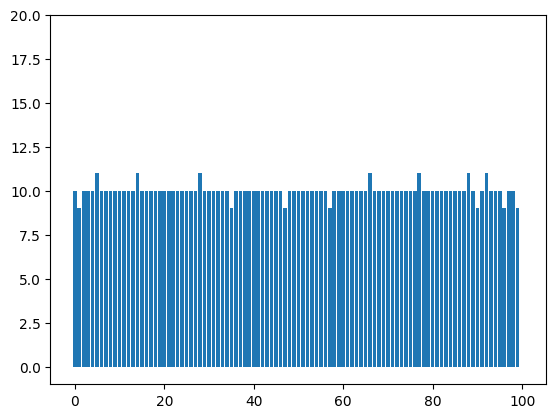

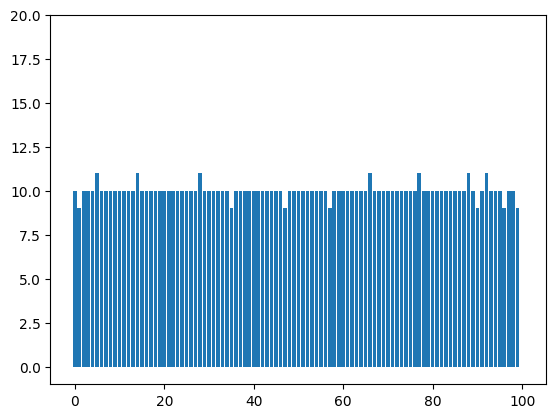

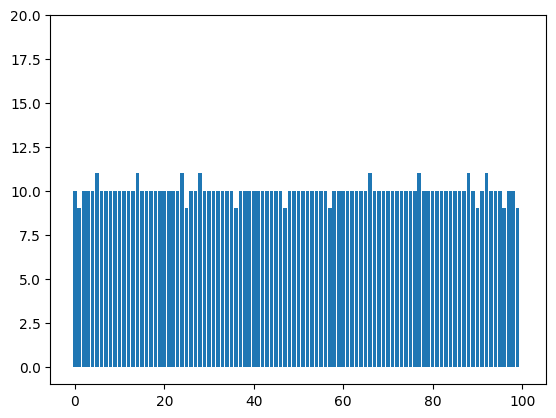

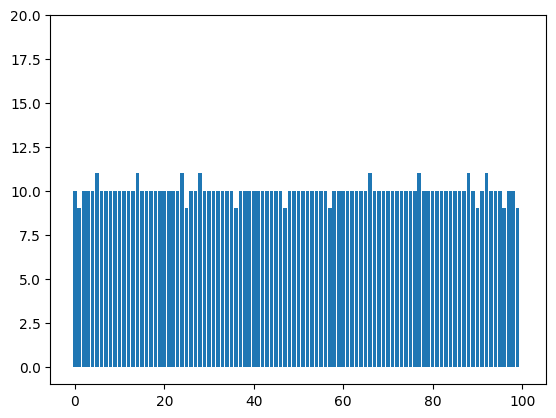

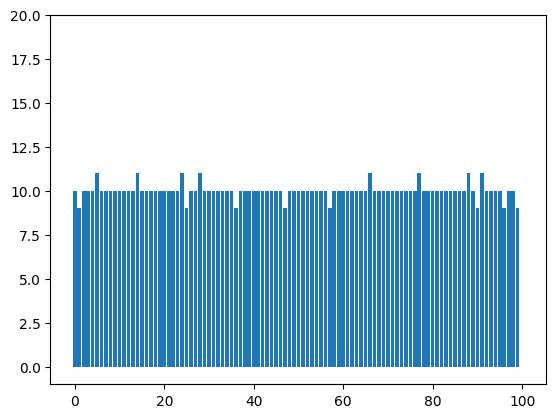

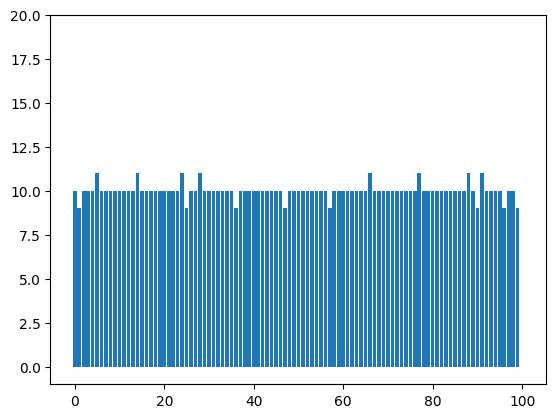

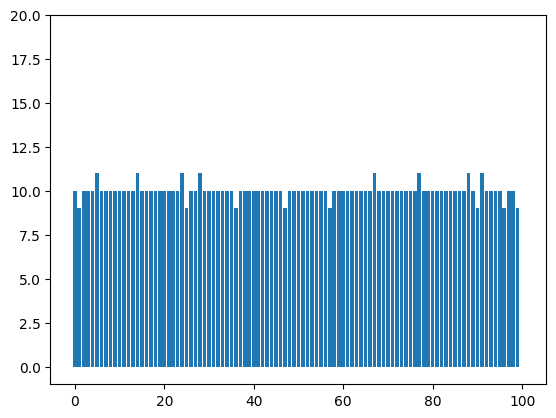

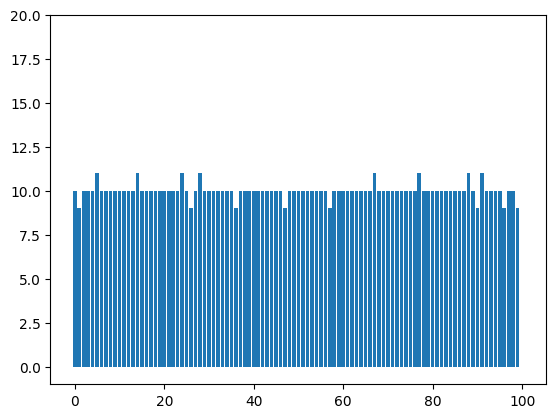

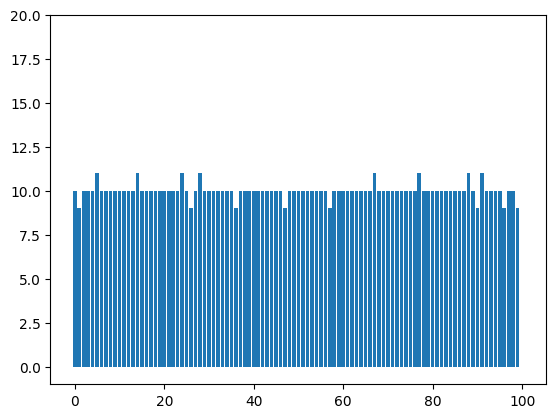

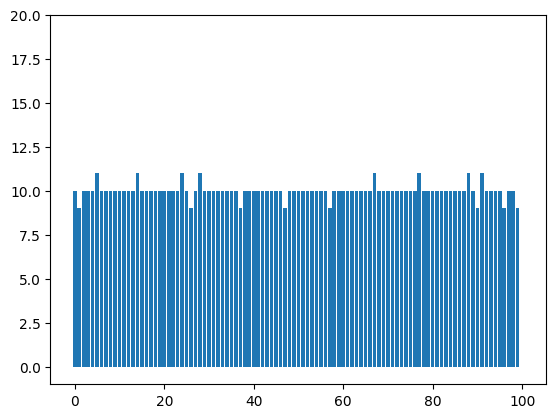

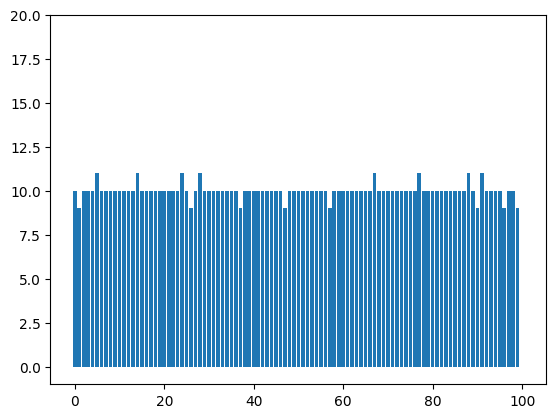

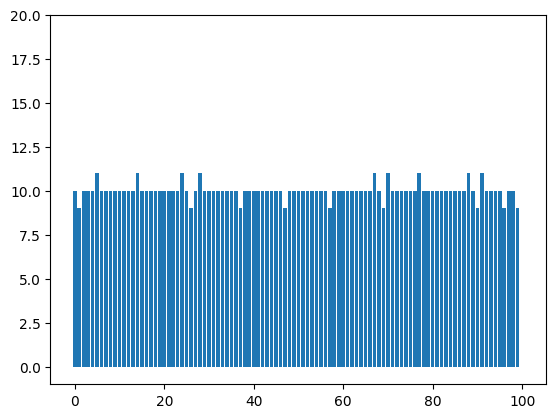

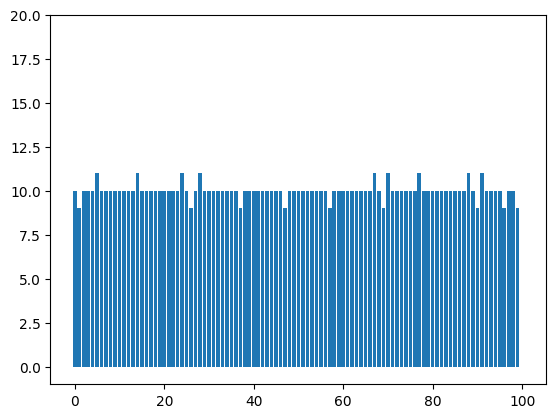

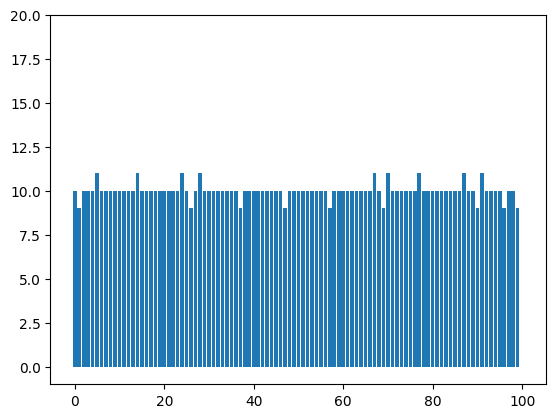

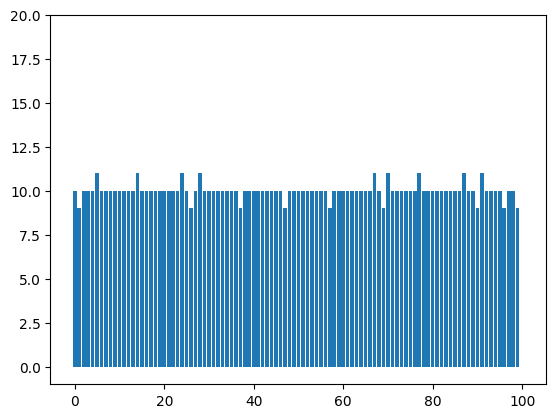

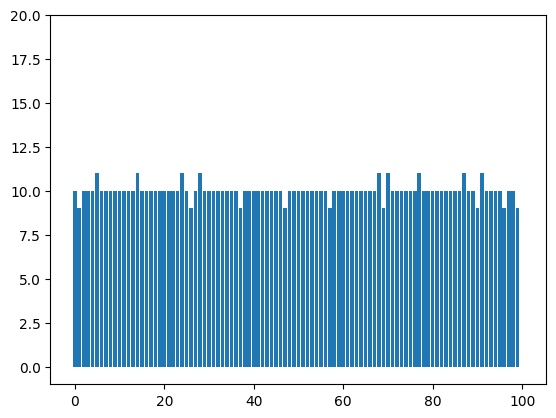

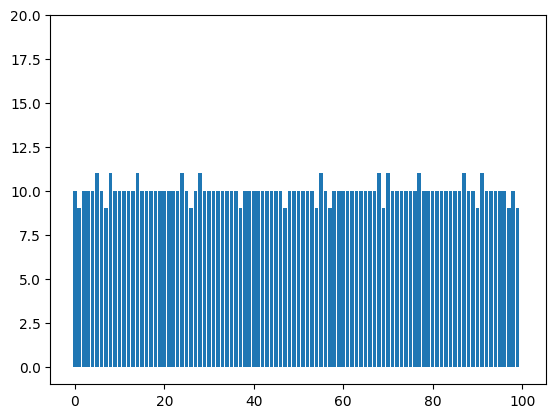

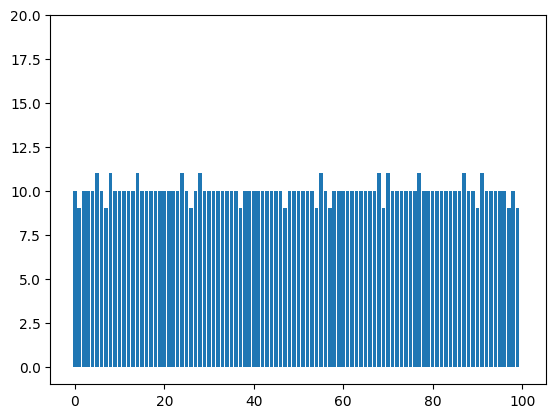

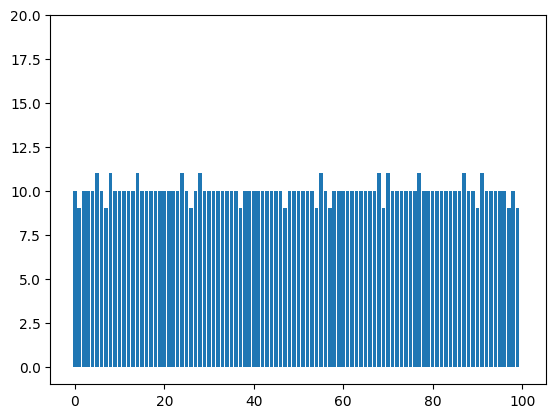

In [14]:

i = 0
for line in x_ions:
    plt.figure()
    plt.ylim(-1, 20)
    plt.bar(np.arange(101), line)
    plt.savefig(f'el_{i}')
    i += 1
    #break